# EDA: Heart Attack Prediction

A heart attack occurs when the flow of blood to the heart is blocked. The blockage is most often a buildup of fat, cholesterol and other substances, which form a plaque in the arteries that feed the heart (coronary arteries).

Sometimes, a plaque can rupture and form a clot that blocks blood flow. The interrupted blood flow can damage or destroy part of the heart muscle.

A heart attack, also called a myocardial infarction, can be fatal, but treatment has improved dramatically over the years. 

<img src= "https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/08/ds00094_im00938_mcdc7_heartattackthu_jpg.jpg" alt ="HD" style='width: 350px;'>

Image and description source: https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106

## About this dataset

* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic
        * trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        * thalach : maximum heart rate achieved

* target : 0 = less chance of heart attack 1 = more chance of heart attack

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import scipy as sp
import seaborn as sns
import re
import os
import time
import plotly.express as px


## Load Dataset

In [2]:
# Loading dataset, checking the shape and first few rows
data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
print (data.shape)
data.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Let's drop the duplicate rows from the dataframe and check the shape
data = data.drop_duplicates()
print (data.shape)
data.dtypes

(302, 14)


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
# Let's look at the stat
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Renaming the columns for better understanding
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'chol_level', 'fasting_blood_sugar', 'resting_ec_results', \
               'max_heart_rate', 'excercise_angina', 'old_peak', 'slope', 'no_major_vessels', 'thal_rate', 'target']

In [6]:
# is ther any null values in the columns? -- no.
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
chol_level             0
fasting_blood_sugar    0
resting_ec_results     0
max_heart_rate         0
excercise_angina       0
old_peak               0
slope                  0
no_major_vessels       0
thal_rate              0
target                 0
dtype: int64

## Separating the Categorical and Numerical columns

In [7]:
column = list(data.columns)

cat = []
num = []

for col in column:
    if len(data[col].value_counts()) < 6:
        cat.append(col)
    else:
        num.append(col)

In [8]:
for col in cat:
    
    plt.figure(figsize=(6, 5))
    df = data[col].value_counts().to_frame().reset_index()
    df.columns = ['Labels', 'Count']
    
    import plotly.graph_objects as go

    fig = go.Figure(data=[go.Bar(
            x=df.Labels, y=df.Count,
            text=df.Count,
            textposition='outside',
        )])
    
    # Customize aspect
    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
    fig.update_layout(title_text='Different Levels of {}'.format(col))

    fig.show()
    

for col in num:
    
    plt.figure(figsize=(6, 5))
    df = data[col].value_counts().to_frame().reset_index()
    df.columns = ['Labels', 'Count']
    
    import plotly.graph_objects as go

    fig = go.Figure(data=[go.Bar(
            x=df.Labels, y=df.Count,
            text=df.Count,
            textposition='outside',
        )])
    
    # Customize aspect
    fig.update_traces(marker_color='rgb(158,202,158)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
    fig.update_layout(title_text='Different Levels of {}'.format(col))

    fig.show()

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

## Corelation

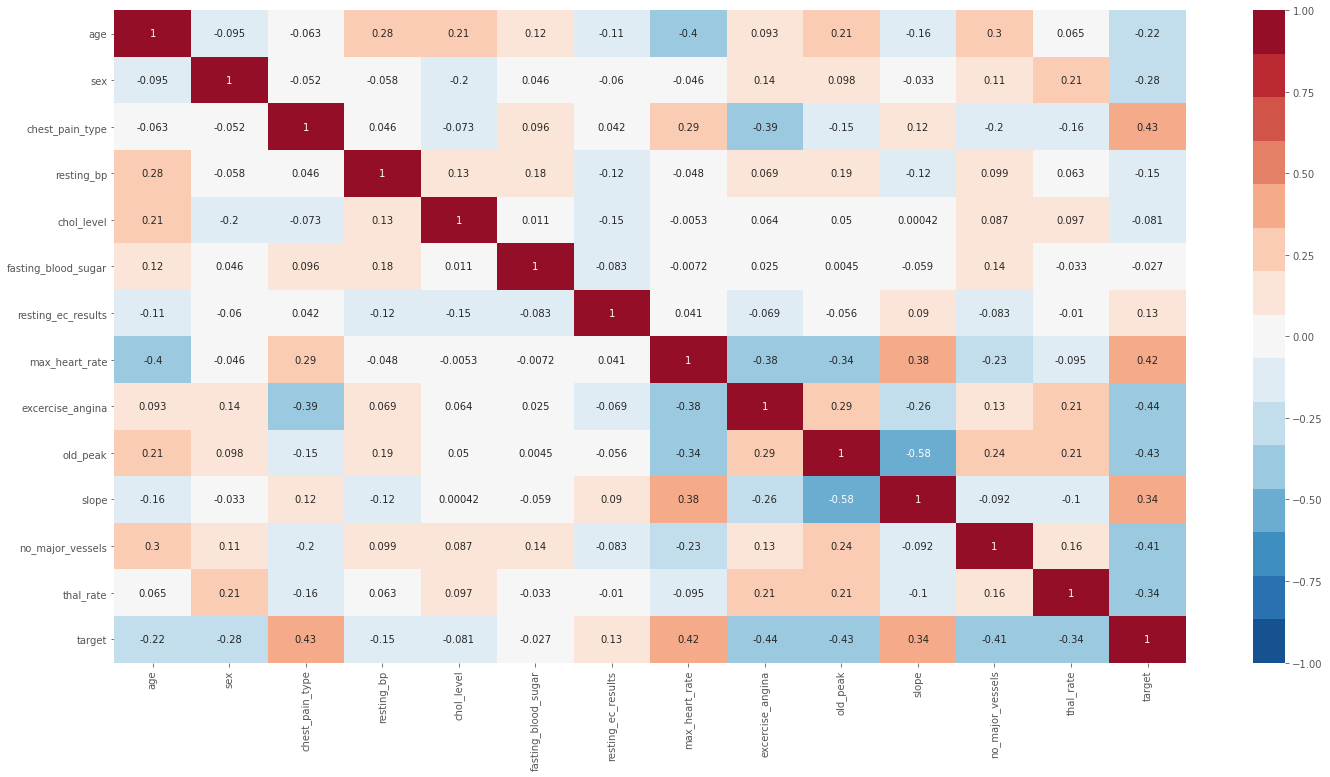

In [9]:
plt.figure(figsize=(24, 12))
sns.heatmap(data.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

<AxesSubplot:>

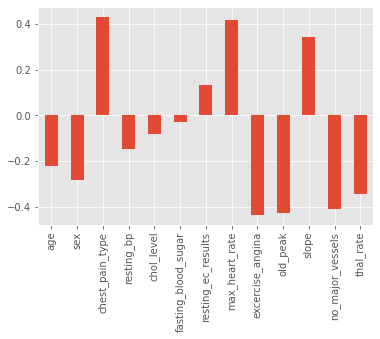

In [10]:
data.corr(method='pearson')[:13].target.plot(kind = 'bar')

The features having corelation coefficient close to +0.4 and -0.4 have stronger relation with the target variable.

## 1) Uni-variate Analysis

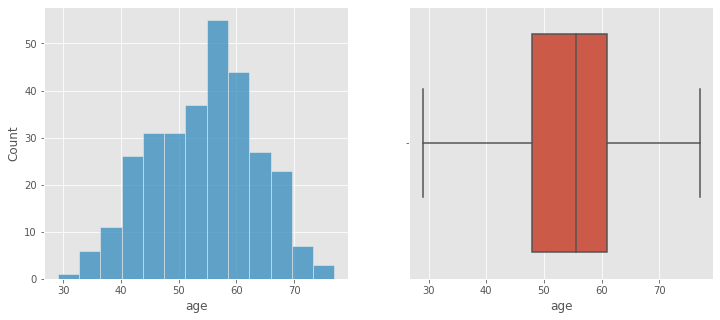

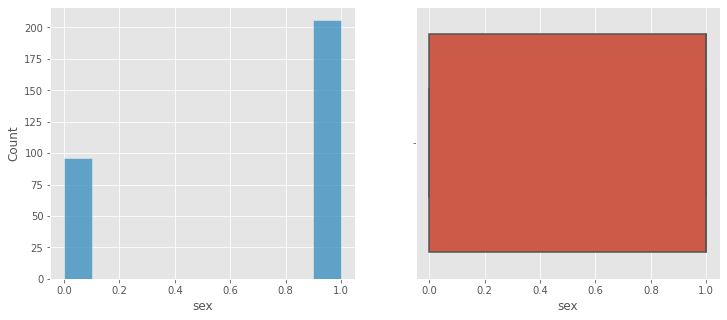

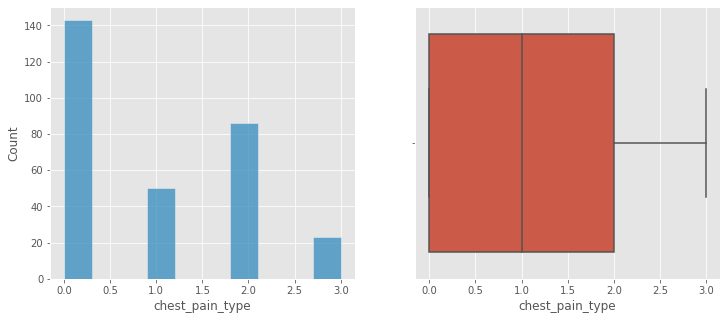

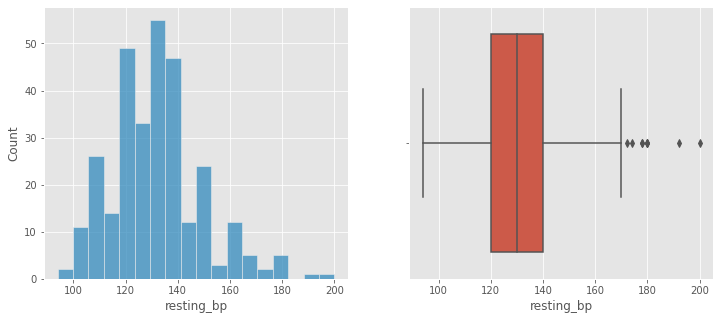

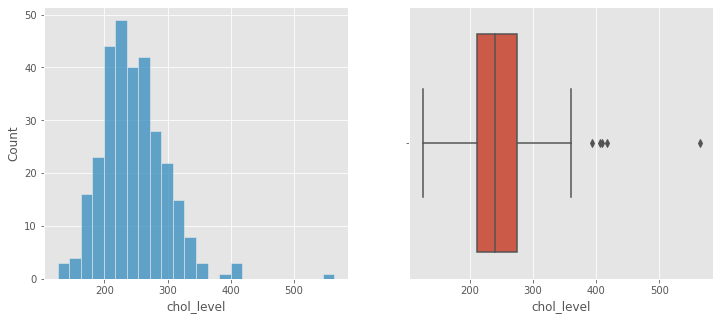

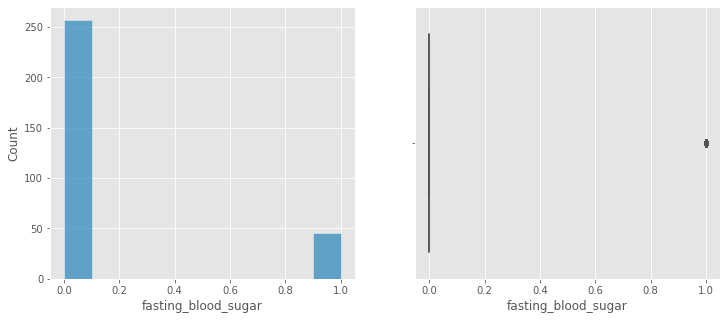

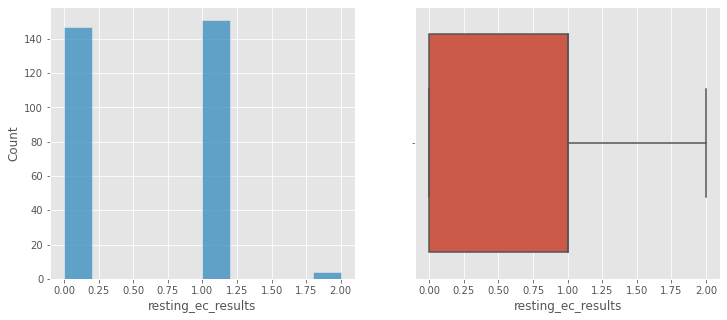

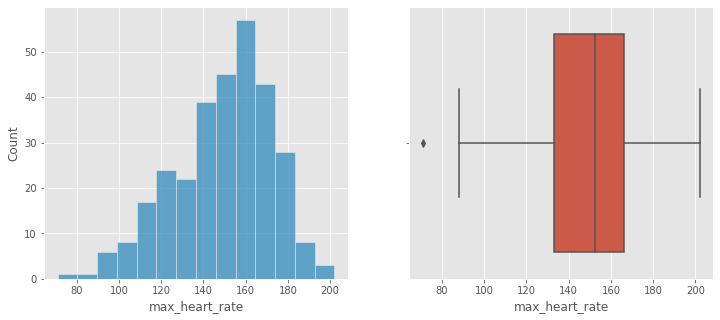

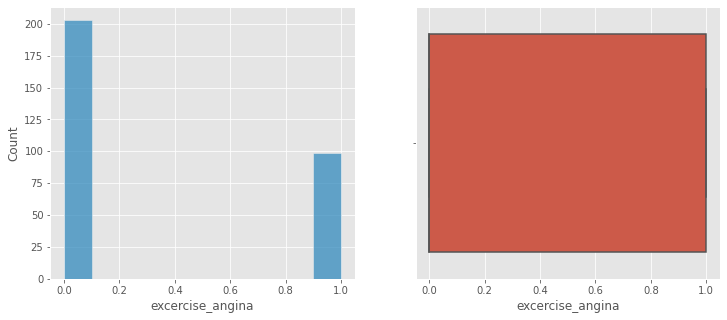

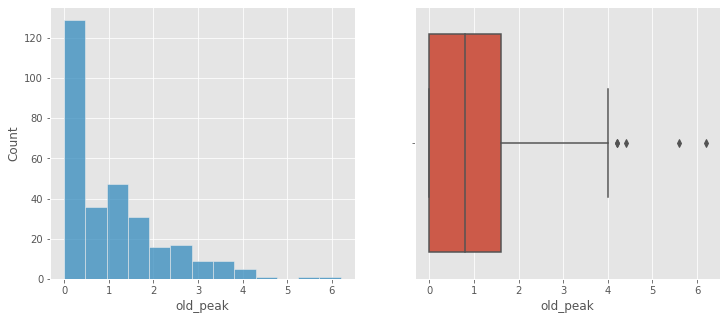

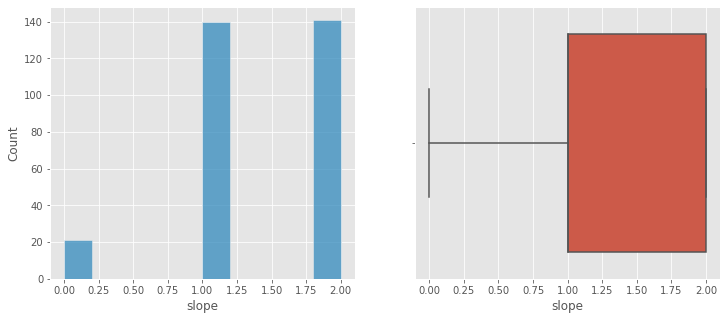

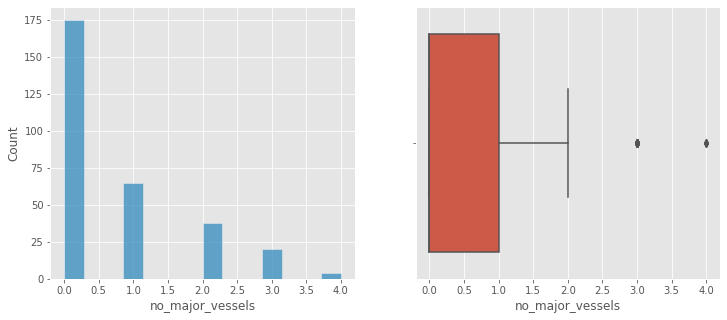

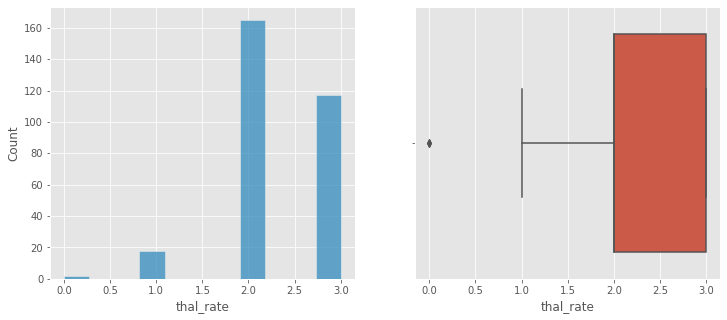

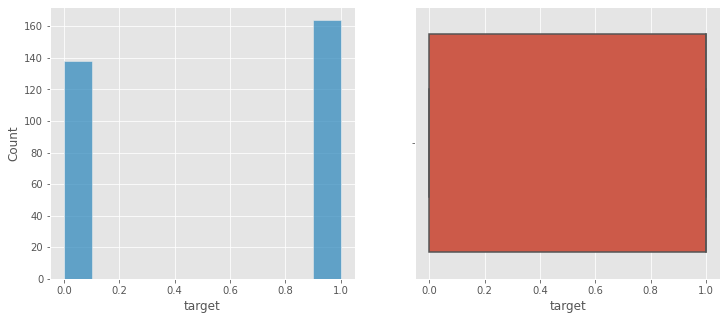

In [11]:
def uni_var(xx):
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[xx])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=xx, data=data)
    plt.show()
    
for col in column:
    uni_var(col)

## 2) Bi-variate Analysis

In [12]:
def count_var_a(xx, hh, title):
    
    g = sns.countplot(x=xx, hue=hh, data=data,palette="Set2")
    plt.title(title)
    plt.ylabel('Count')
    plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
    plt.show()

### Realationship of **chest_pain_type** with other features

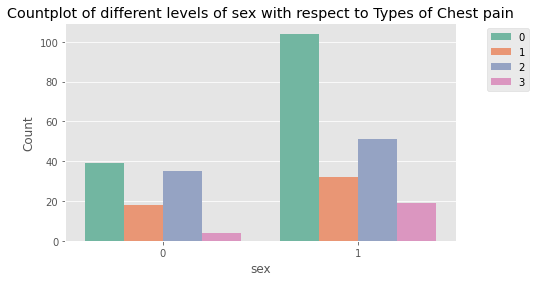

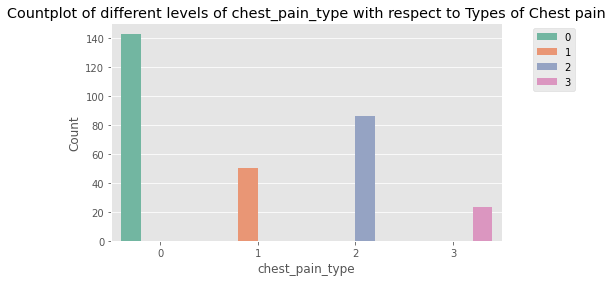

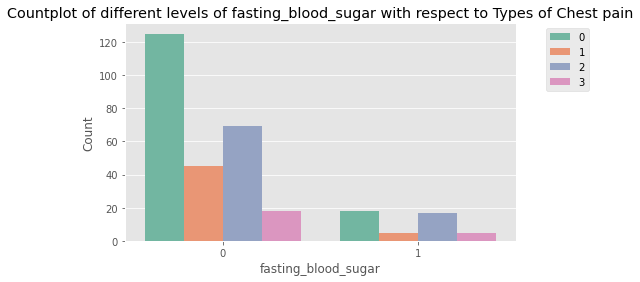

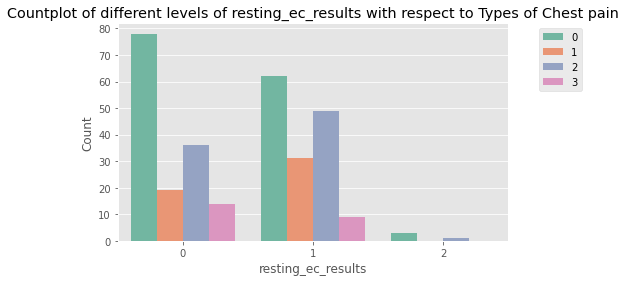

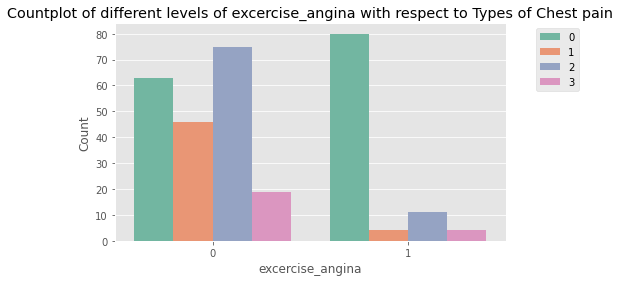

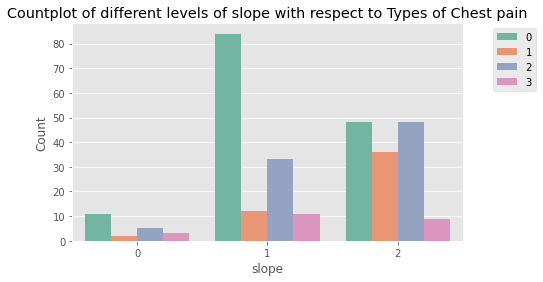

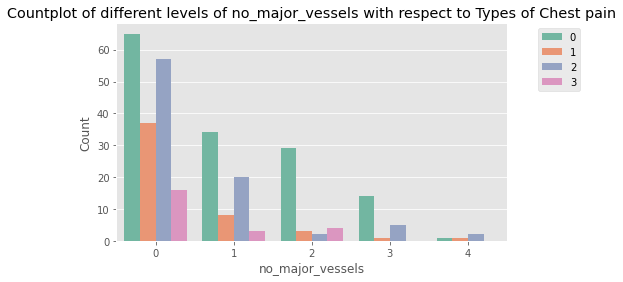

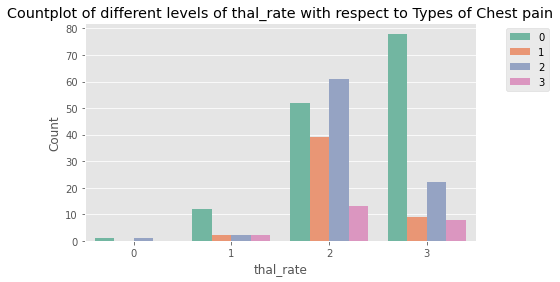

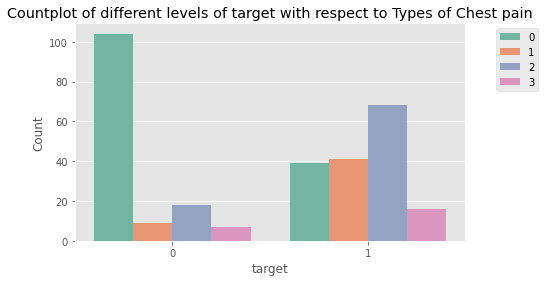

In [13]:
for col in cat:
    
    plt.figure(figsize=(7,4))
    count_var_a(col, 'chest_pain_type', 'Countplot of different levels of {} with respect to Types of Chest pain'.format(col))

### Realationship of **excercise_angina** with other features

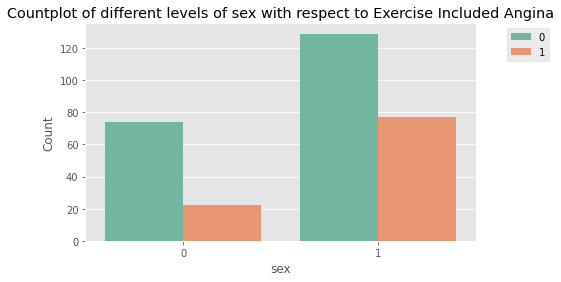

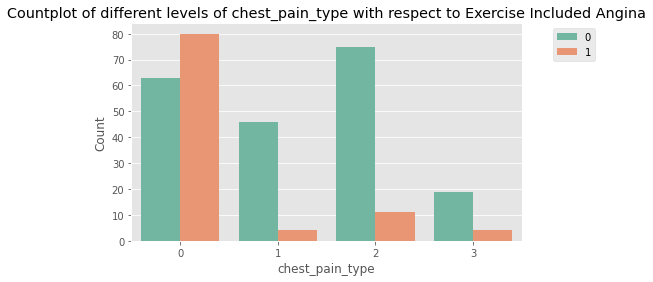

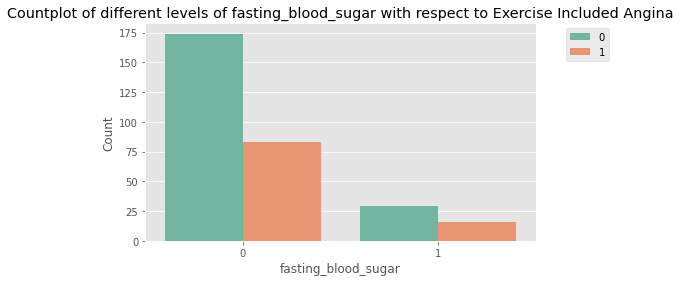

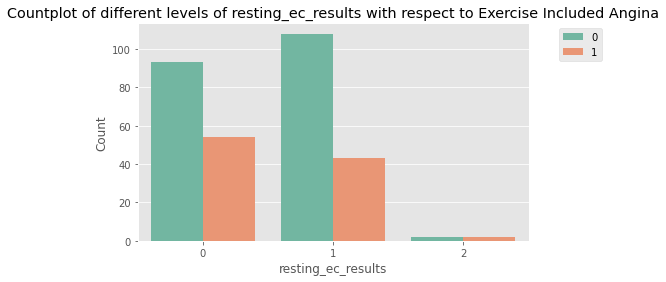

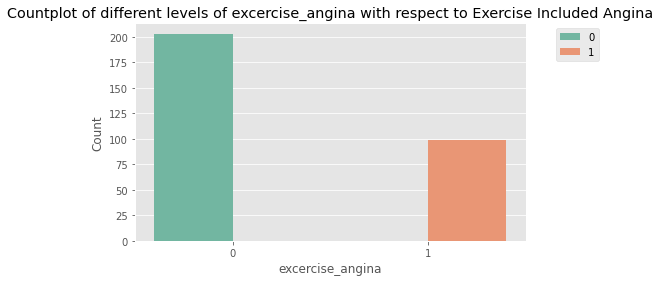

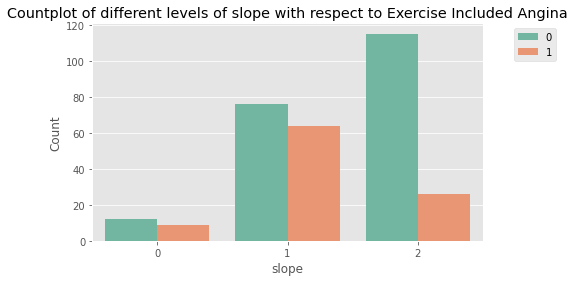

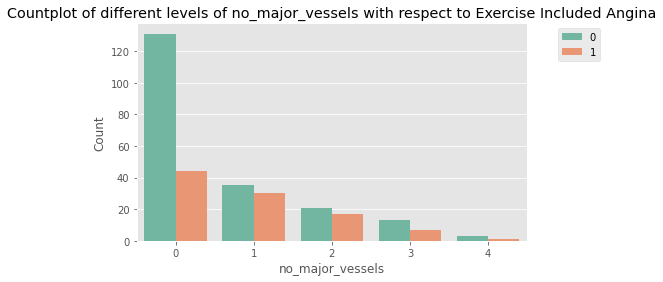

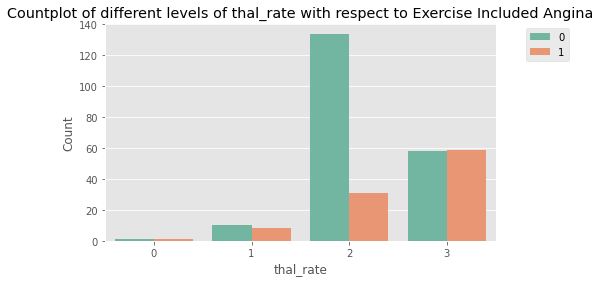

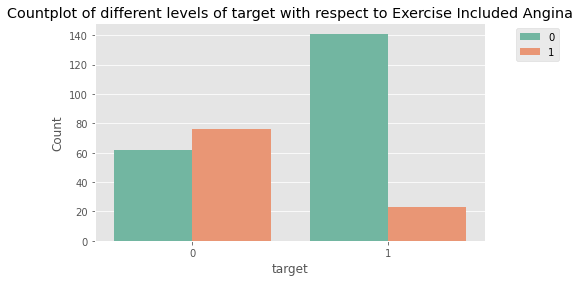

In [14]:
for col in cat:
    
    plt.figure(figsize=(7,4))
    count_var_a(col, 'excercise_angina', 'Countplot of different levels of {} with respect to Exercise Included Angina'.format(col))

### Realationship of **slope** with other features

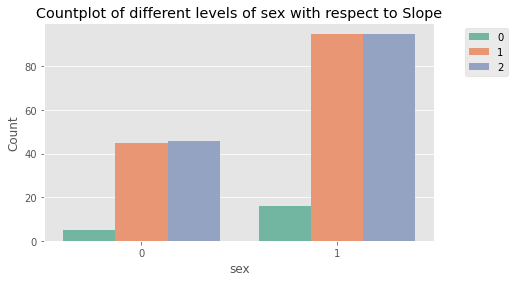

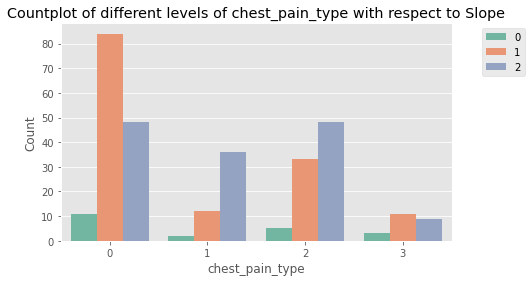

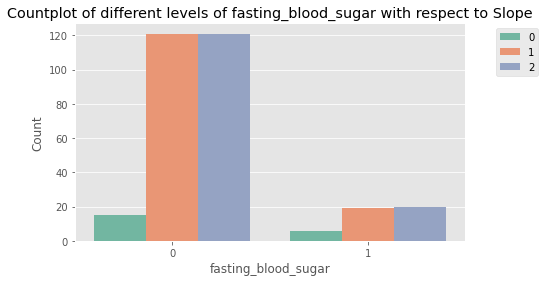

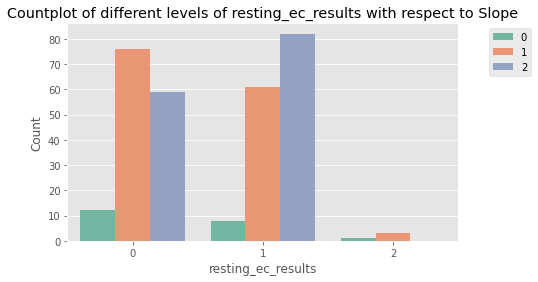

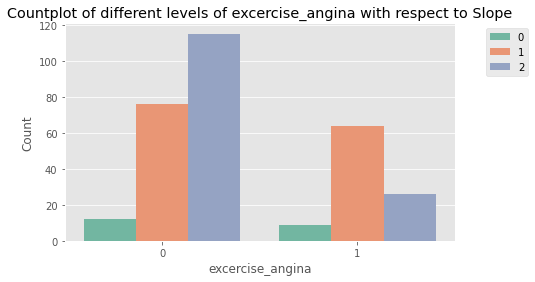

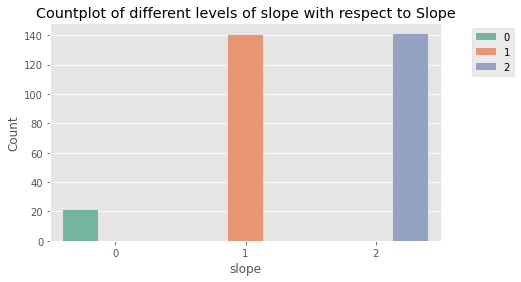

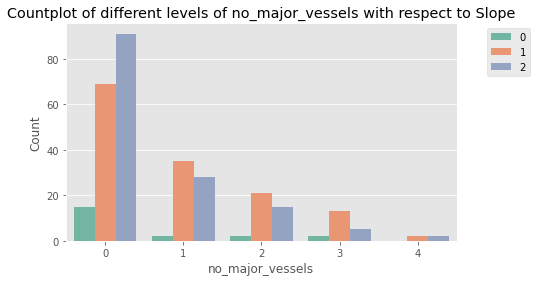

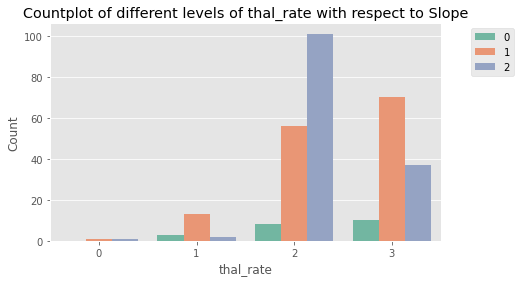

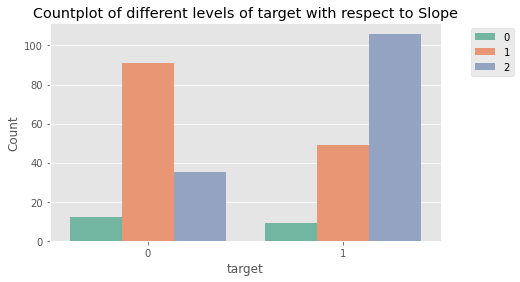

In [15]:
for col in cat:
    
    plt.figure(figsize=(7,4))
    count_var_a(col, 'slope', 'Countplot of different levels of {} with respect to Slope'.format(col))

### Realationship of **no_major_vessels** with other features

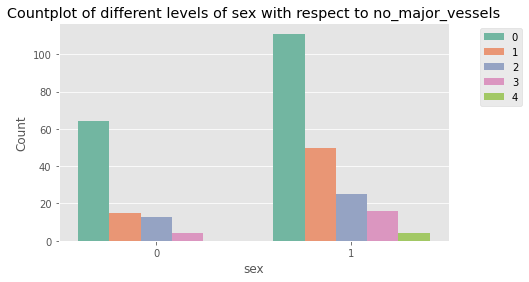

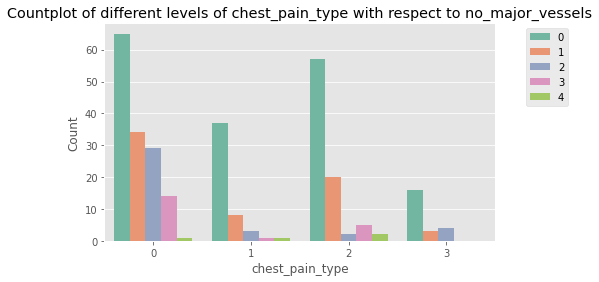

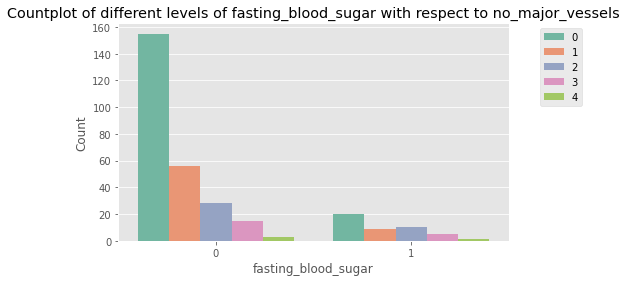

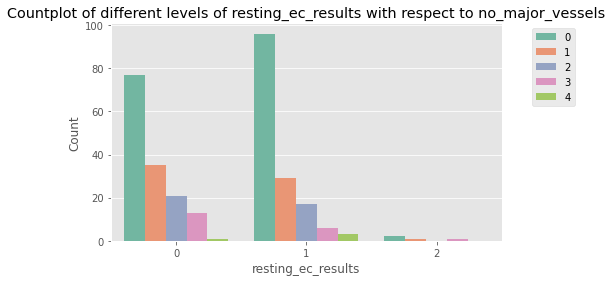

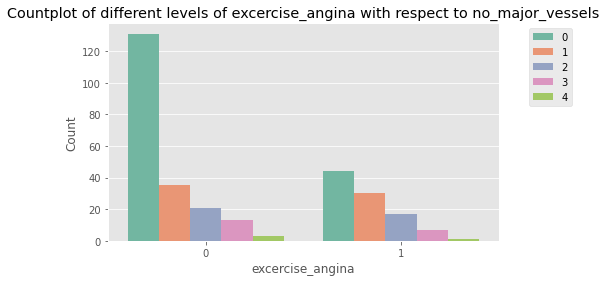

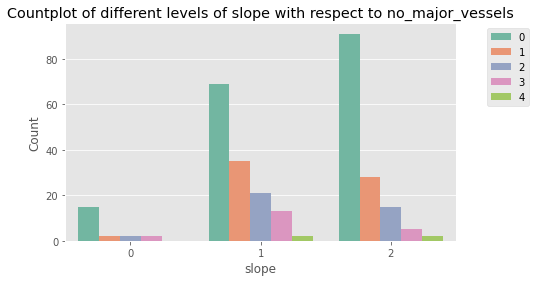

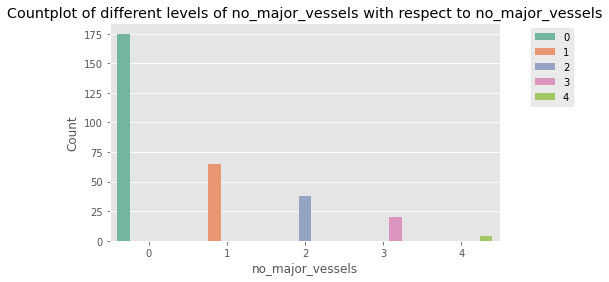

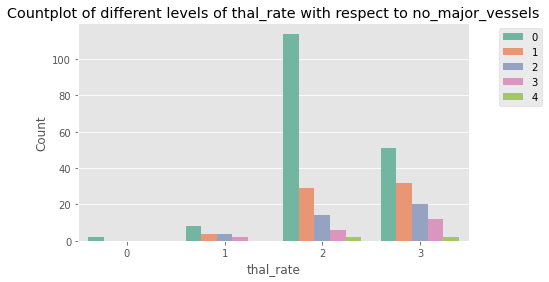

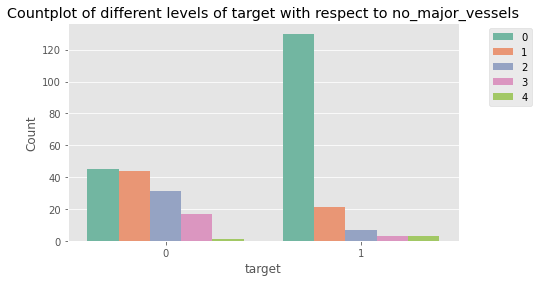

In [16]:
for col in cat:
    
    plt.figure(figsize=(7,4))
    count_var_a(col, 'no_major_vessels', 'Countplot of different levels of {} with respect to no_major_vessels'.format(col))

### Realationship of **thal_rate** with other features

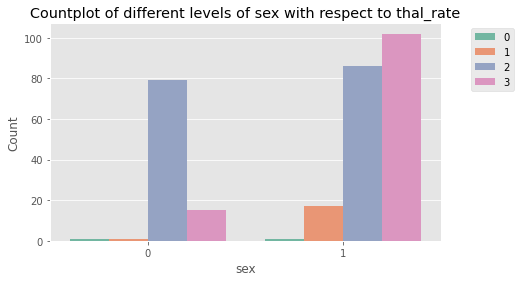

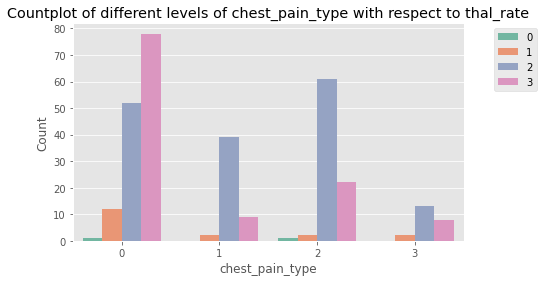

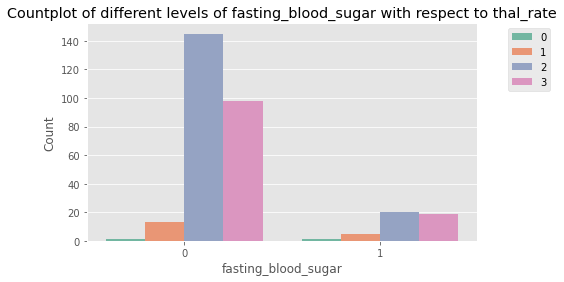

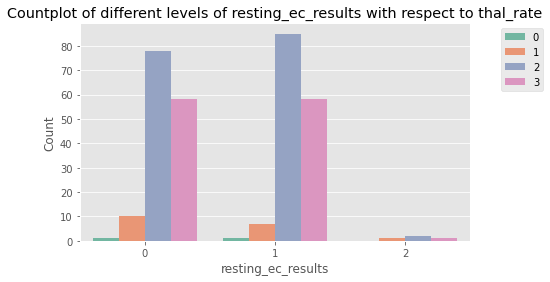

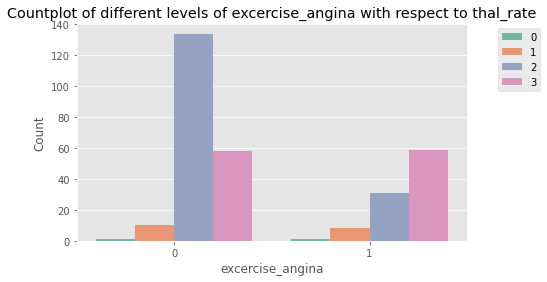

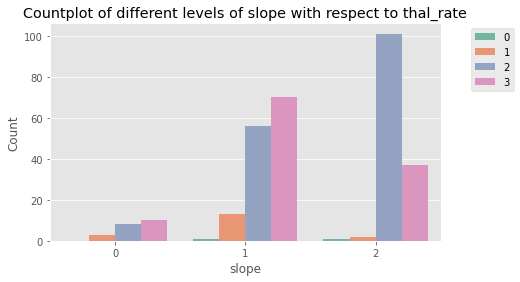

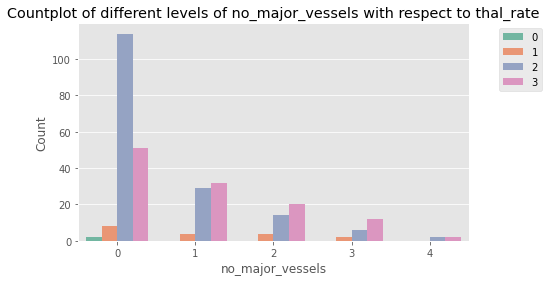

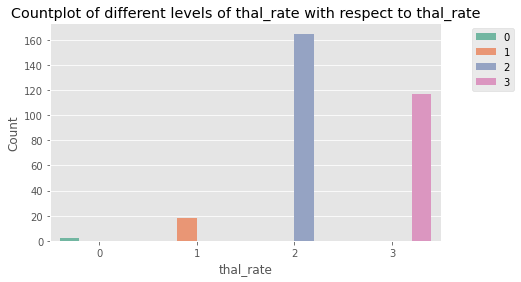

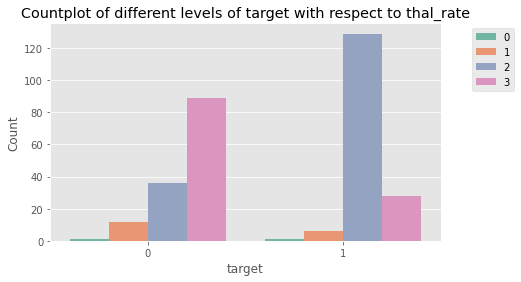

In [17]:
for col in cat:
    
    plt.figure(figsize=(7,4))
    count_var_a(col, 'thal_rate', 'Countplot of different levels of {} with respect to thal_rate'.format(col))

### Realationship of **max_heart_rate** with other features

In [18]:
def count_var_a(col, title):
    
    sns.stripplot(x="max_heart_rate",y=col,hue=col, data=data)
    plt.title(title)
    plt.ylabel('Levels')
    plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
    plt.xticks(rotation=90) 
    plt.show()

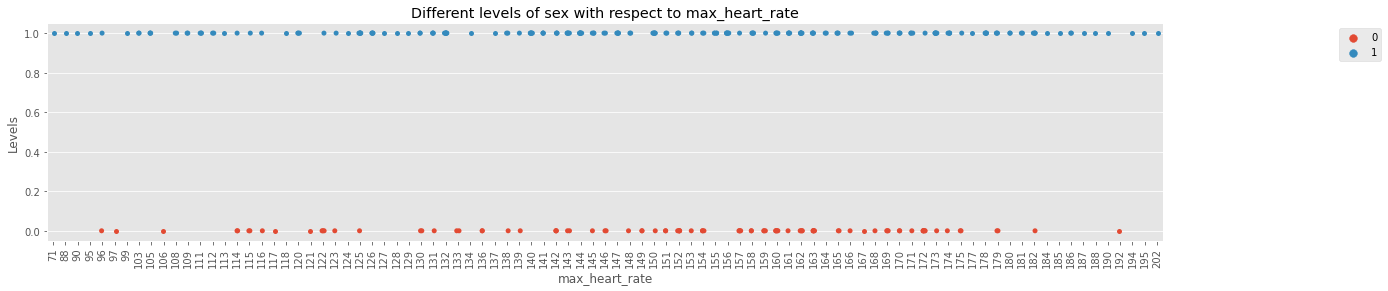

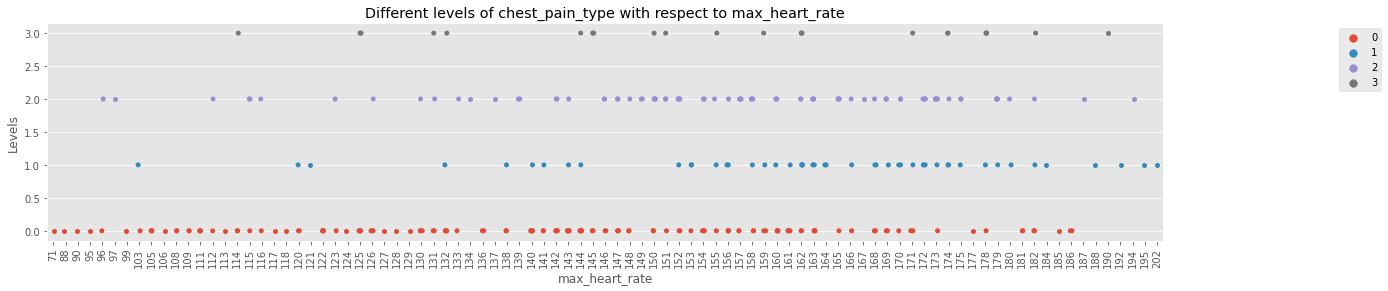

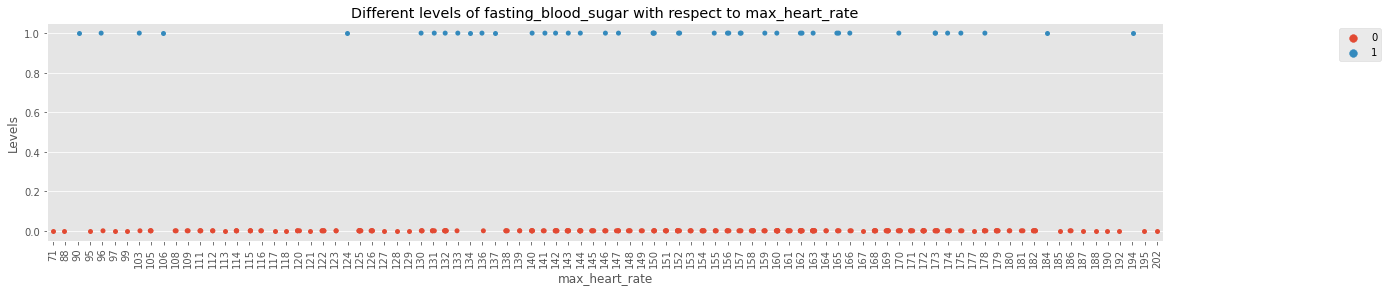

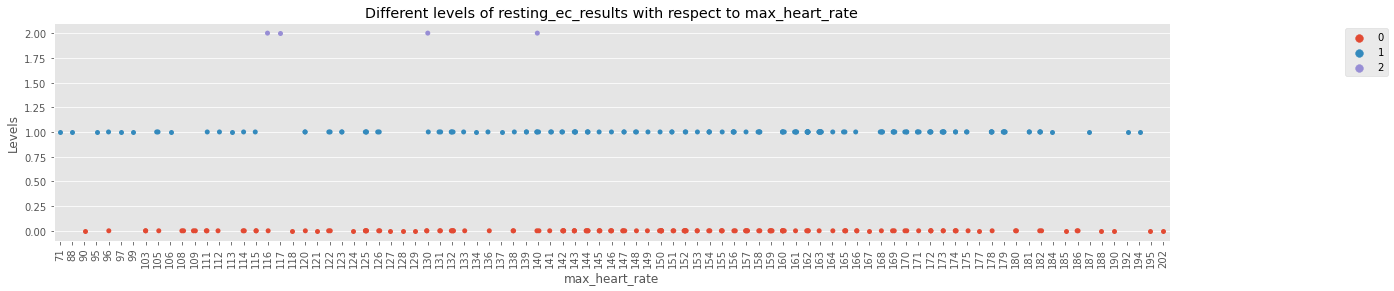

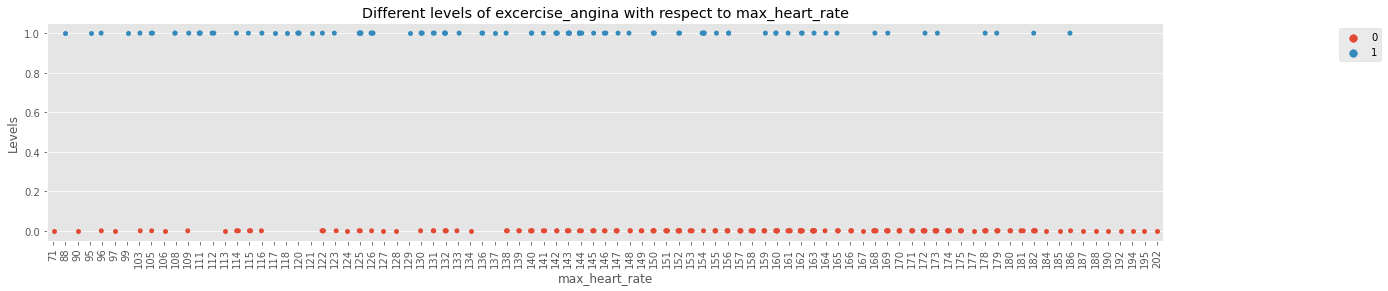

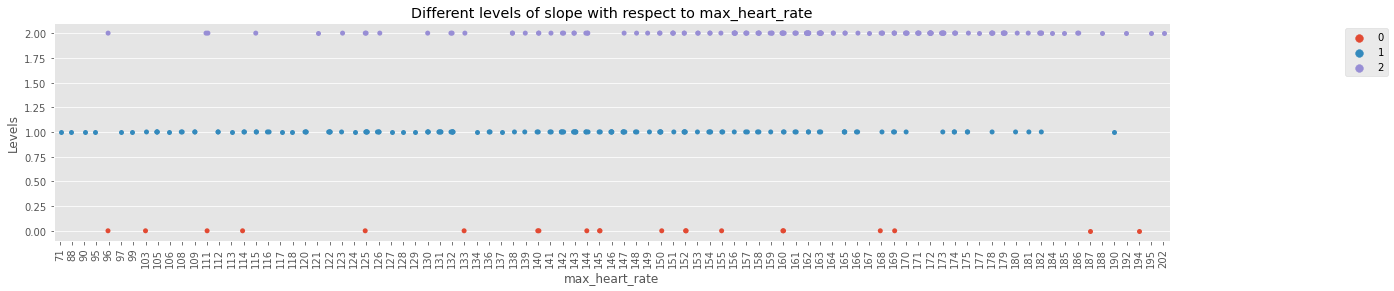

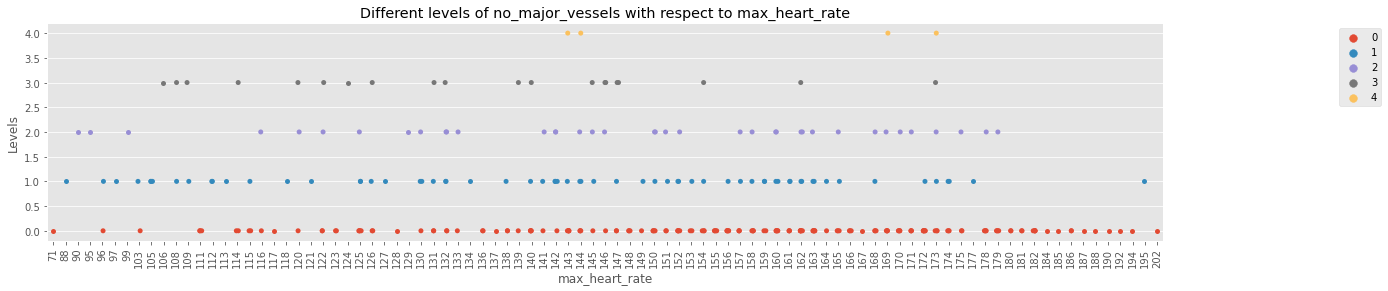

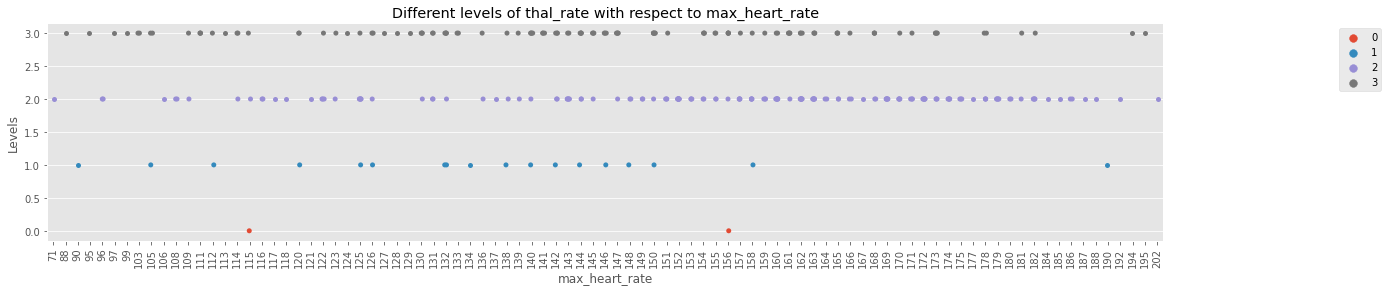

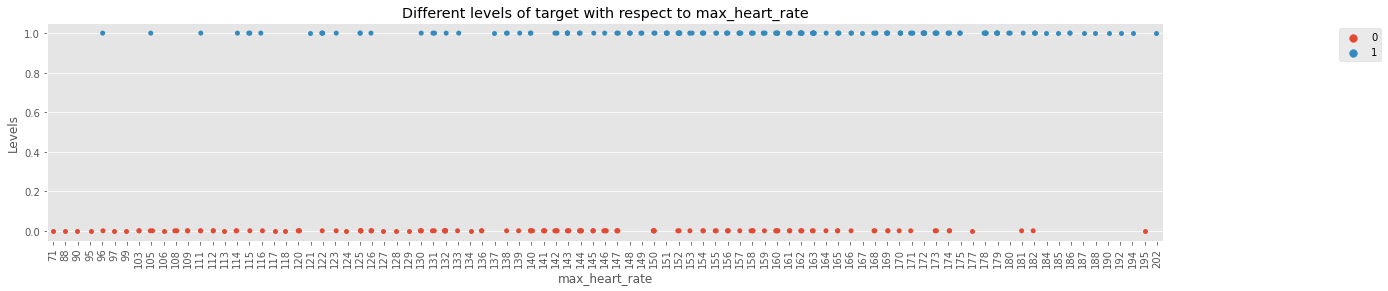

In [19]:
for col in cat:
    
    plt.figure(figsize=(20,4))
    count_var_a(col, 'Different levels of {} with respect to max_heart_rate'.format(col))

### Realationship of **old_peak** with other features

In [20]:
def count_var_a(col, title):
    
    sns.stripplot(x="old_peak",y=col,hue=col, data=data)
    plt.title(title)
    plt.ylabel('Levels')
    plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
    plt.xticks(rotation=90) 
    plt.show()

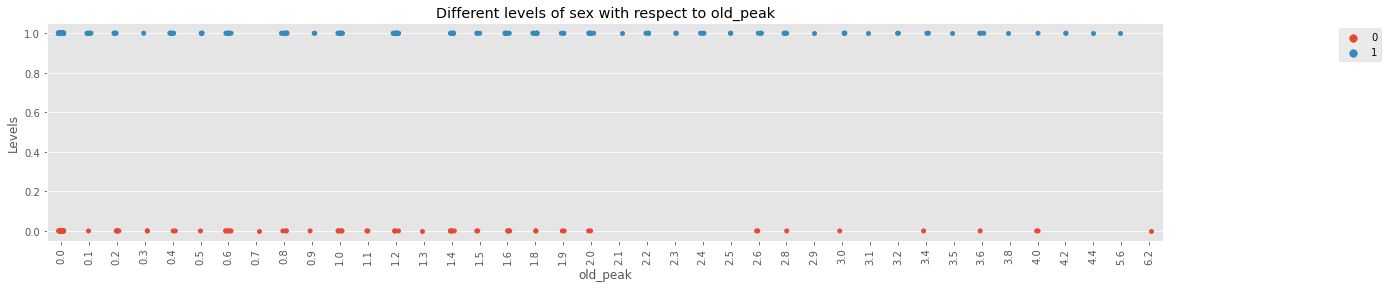

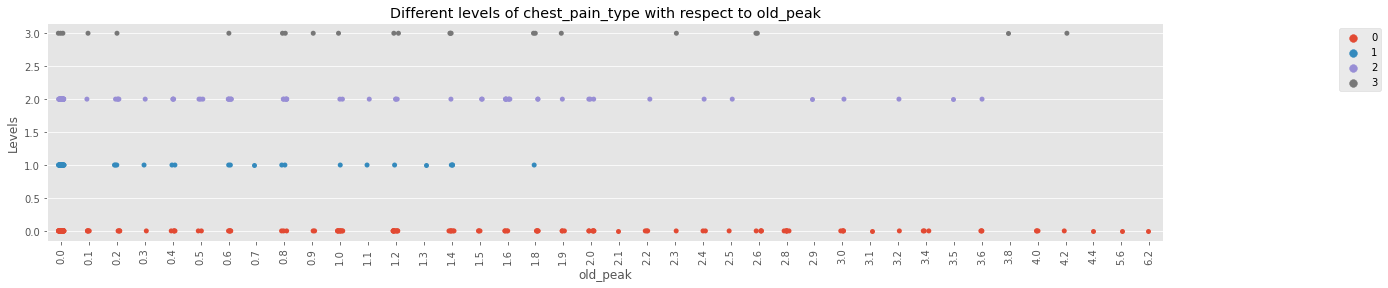

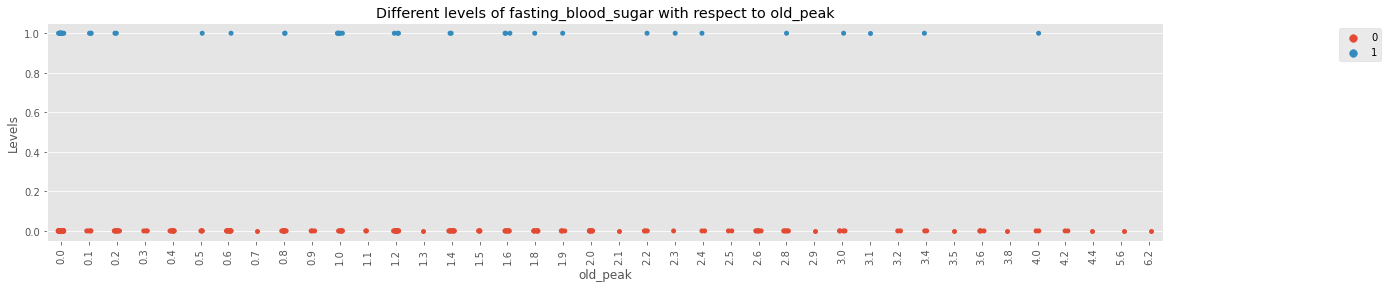

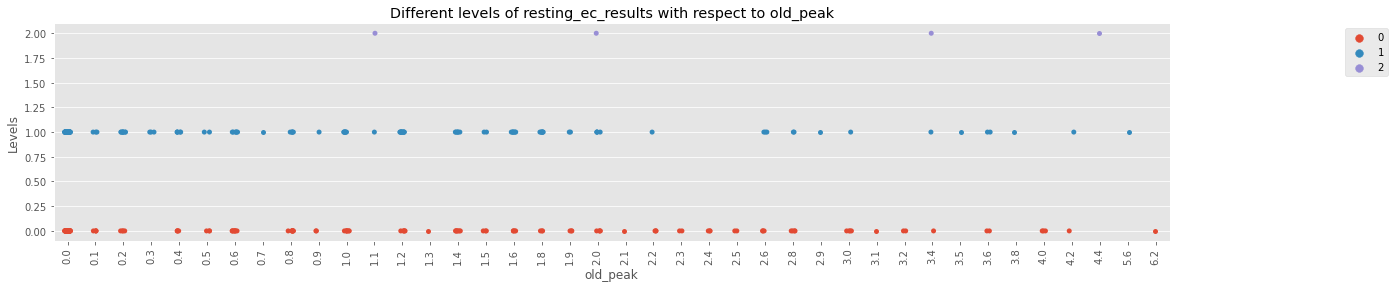

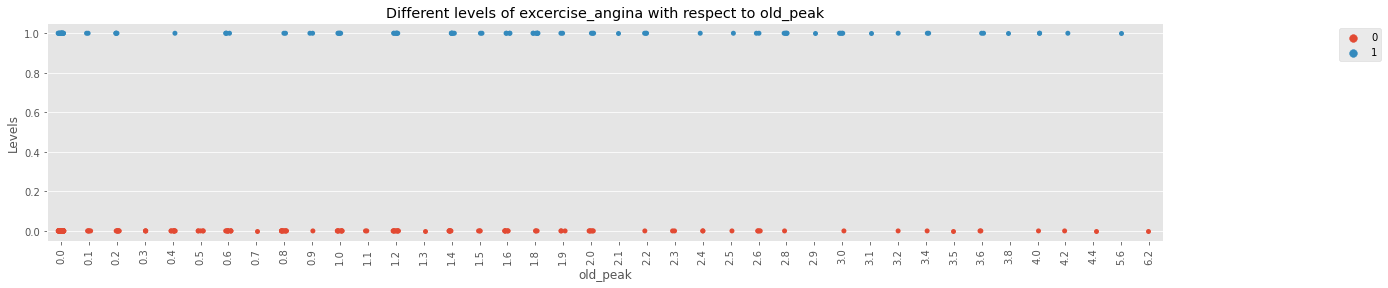

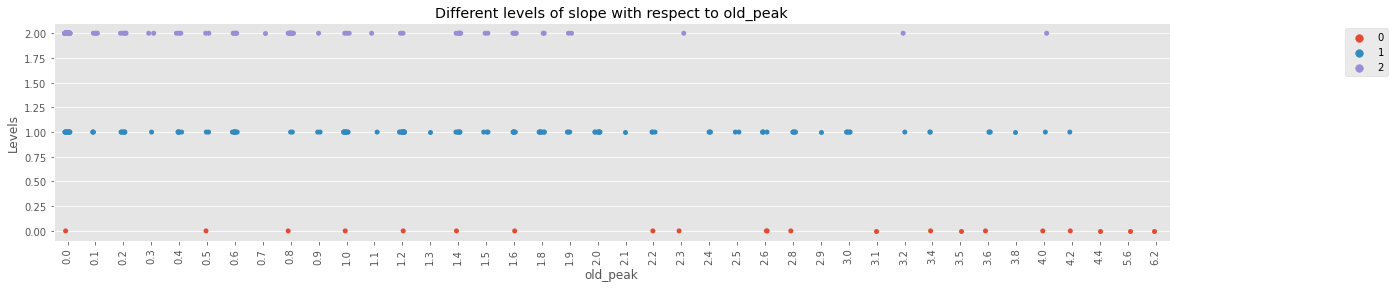

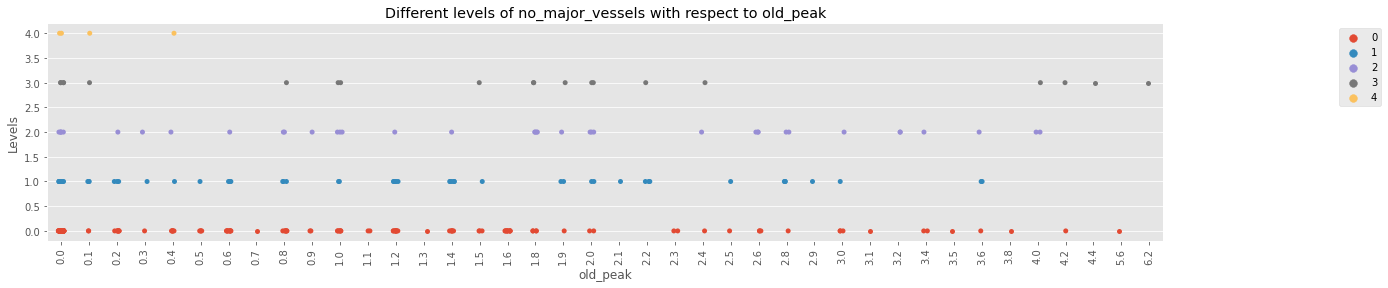

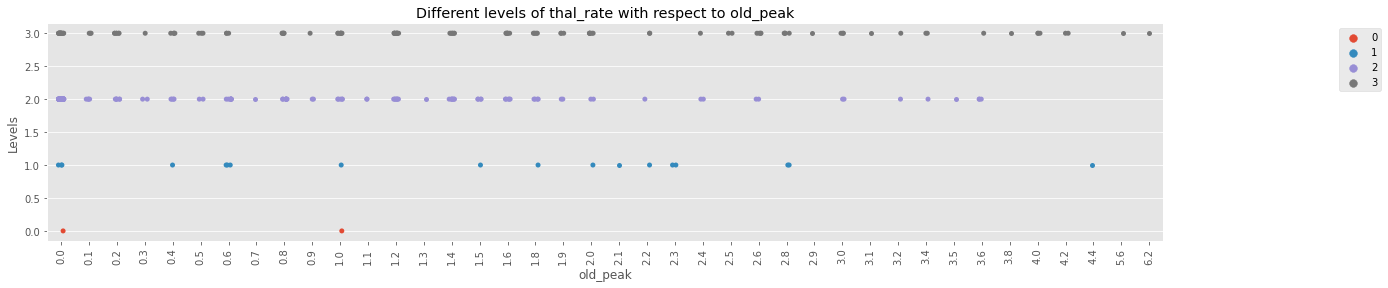

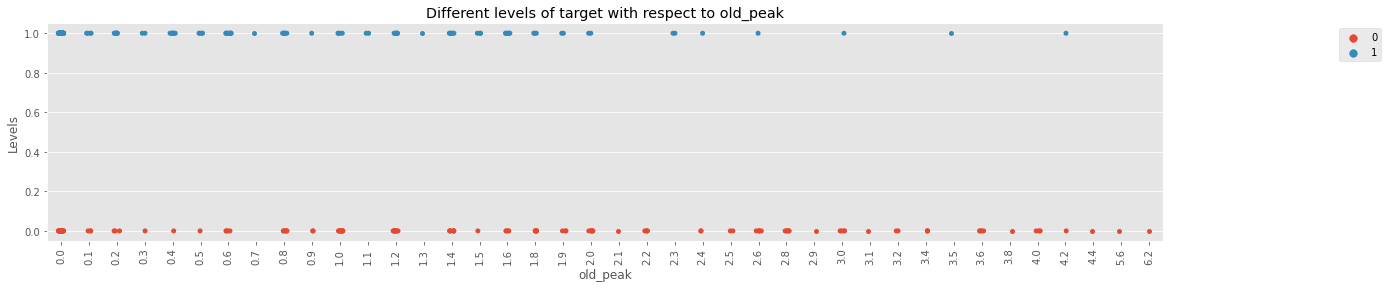

In [21]:
for col in cat:
    
    plt.figure(figsize=(20,4))
    count_var_a(col, 'Different levels of {} with respect to old_peak'.format(col))

In [22]:
data.corr().target

age                   -0.221476
sex                   -0.283609
chest_pain_type        0.432080
resting_bp            -0.146269
chol_level            -0.081437
fasting_blood_sugar   -0.026826
resting_ec_results     0.134874
max_heart_rate         0.419955
excercise_angina      -0.435601
old_peak              -0.429146
slope                  0.343940
no_major_vessels      -0.408992
thal_rate             -0.343101
target                 1.000000
Name: target, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



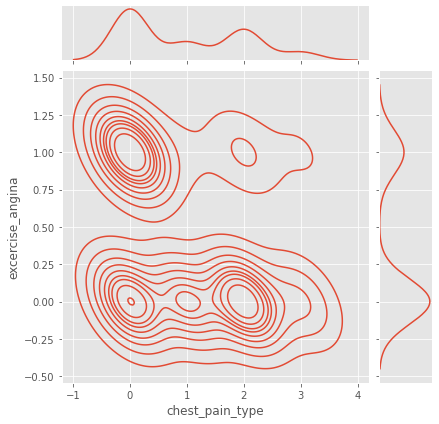

In [23]:
sns.jointplot('chest_pain_type', "excercise_angina", data, kind='kde', height=6)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



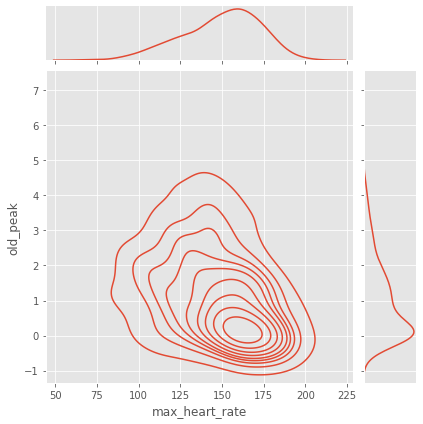

In [24]:
sns.jointplot('max_heart_rate', "old_peak", data, kind='kde', height=6)
plt.show()

### Target vs Numerical Features

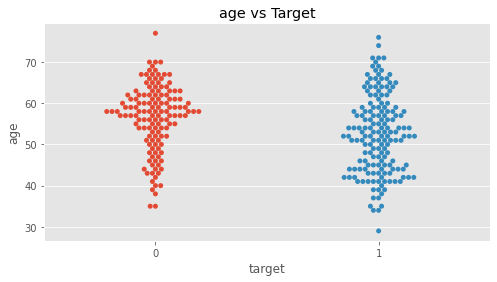

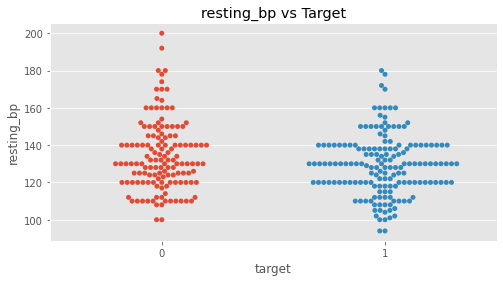

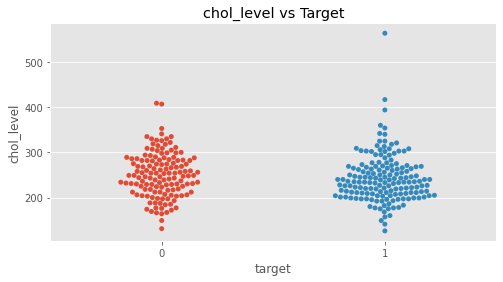

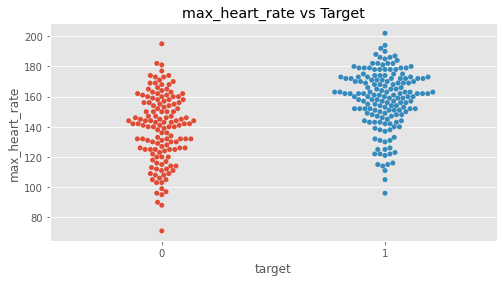

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



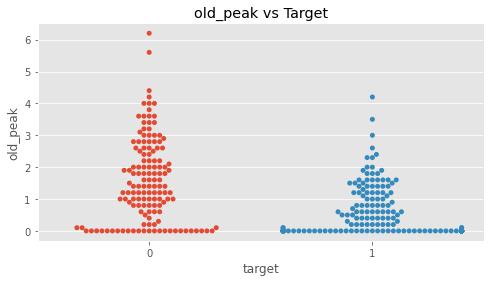

In [25]:
for col in num:
    
    plt.figure(figsize=(8,4))
    ax = sns.swarmplot(x="target", y=col, data=data)
    plt.title('{} vs Target'.format(col))
    plt.show()

In [26]:
data.corr().target

age                   -0.221476
sex                   -0.283609
chest_pain_type        0.432080
resting_bp            -0.146269
chol_level            -0.081437
fasting_blood_sugar   -0.026826
resting_ec_results     0.134874
max_heart_rate         0.419955
excercise_angina      -0.435601
old_peak              -0.429146
slope                  0.343940
no_major_vessels      -0.408992
thal_rate             -0.343101
target                 1.000000
Name: target, dtype: float64

## 3) Multi-variate Analysis

In [27]:
def multi_var_(xx, yy, ss):
    
    sns.set_theme(style="white")
    sns.relplot(x=xx, y=yy, hue="target", size=ss,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

### Relationship of 'chest_pain_type' and 'max_heart_rate' with Target

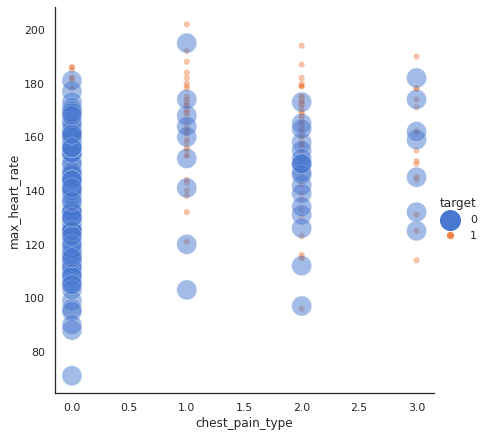

In [28]:
multi_var_('chest_pain_type', 'max_heart_rate', 'target')

### Relationship of 'excercise_angina' and 'max_heart_rate' with Target

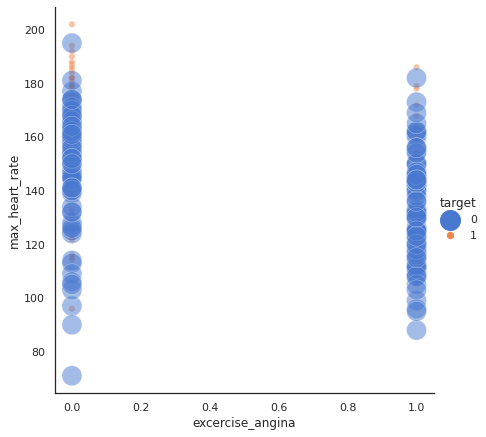

In [29]:
multi_var_('excercise_angina', 'max_heart_rate', 'target')

### Relationship of 'excercise_angina' and 'old' with Target

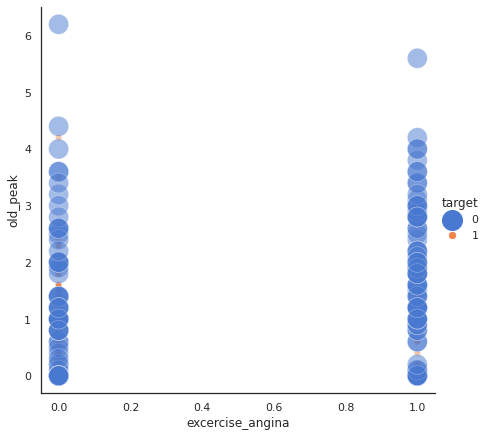

In [30]:
multi_var_('excercise_angina', 'old_peak', 'target')

### Relationship of 'no_major_vessels' and 'old_peak' with Target

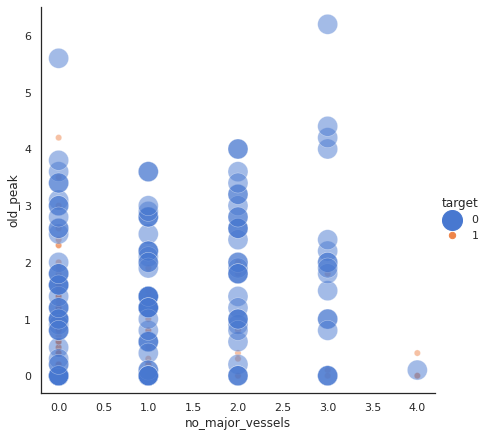

In [31]:
multi_var_('no_major_vessels', 'old_peak', 'target')

### Relationship of 'age', 'thal_rate and 'sex' with Target

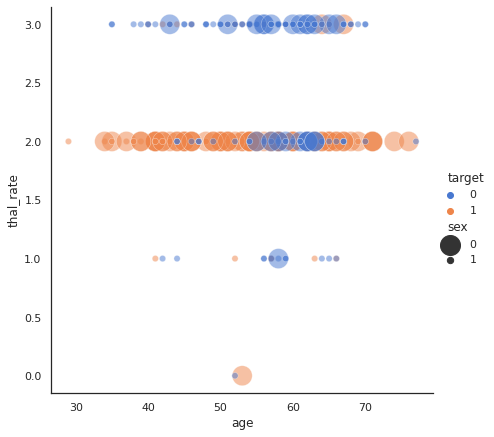

In [32]:
multi_var_('age', 'thal_rate', 'sex')

### Target vs particular features with an effect of Age

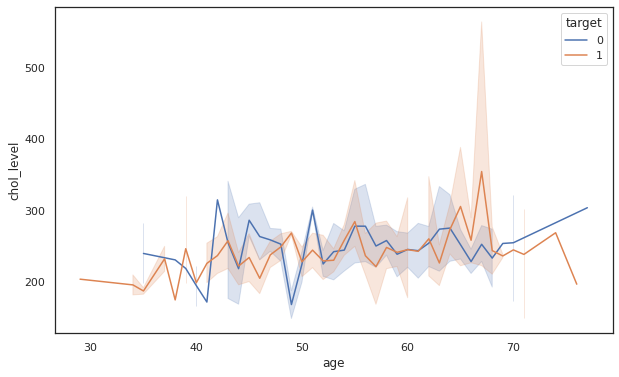

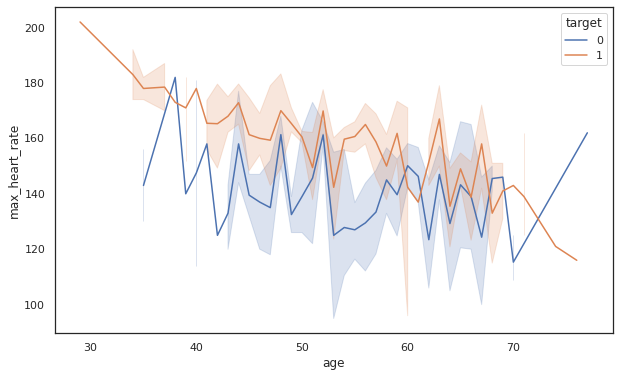

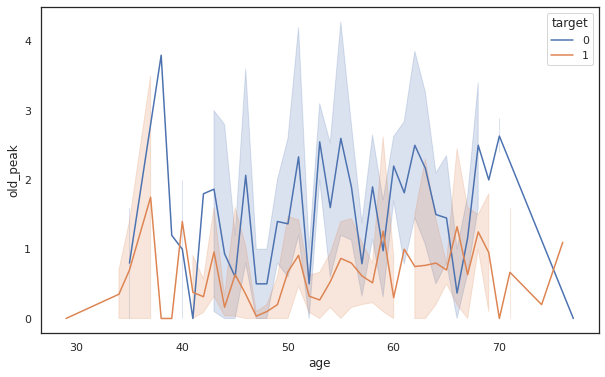

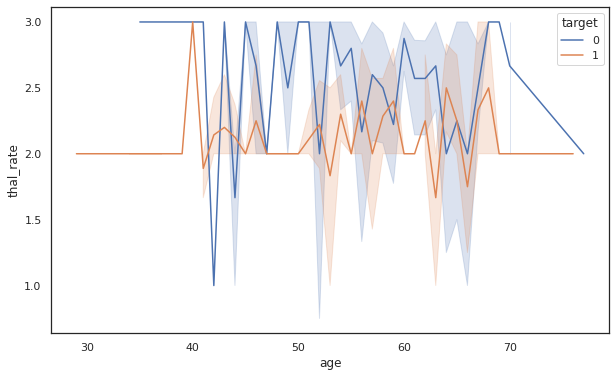

In [33]:
feat = ["chol_level", "max_heart_rate", "old_peak", "thal_rate"]

for ff in feat:
    plt.figure(figsize=(10,6))
    sns.lineplot(x="age",y=ff,hue="target",data=data)
    plt.show()

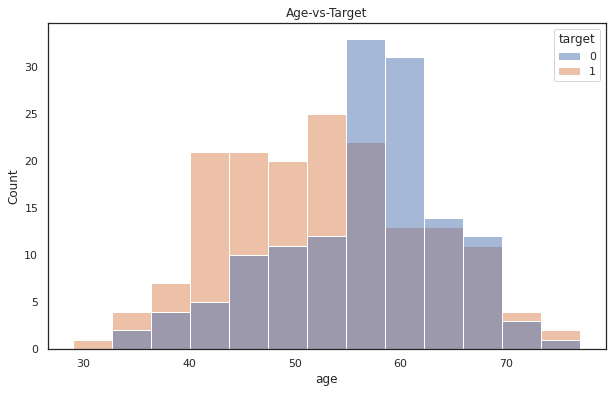

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = 'age', hue = 'target')
plt.title("Age-vs-Target")
plt.show()

# Prediction

(will be available soon)

### Much appreciation for taking a look! 

<img src= "https://images.greetingsisland.com/images/cards/thank-you/previews/a-round-of-thanks.png?auto=format,compress" alt ="HD" style='width: 500px;'>

## References

* https://seaborn.pydata.org/examples/scatter_bubbles.html
* https://plotly.com/python/bar-charts/
* https://seaborn.pydata.org/generated/seaborn.boxplot.html
* https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot
* https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot
* https://www.kaggle.com/aryantiwari123/heart-attack-analysis-eda



